In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/EDA/Bowler Performance Metrics.csv')
df

,Bowler,Team,WTS,CS,ES,BBI,BWTS,SPS,MI,EI,AVMS
0,A Bethapudi,Durham City CC Under 13 Gold,0.0455,19.6667,5.3636,14.6000,0.0000,0.6000,0.1818,1.4000,0.1239
1,A Cockling,Littletown CC Under 13,0.0833,10.7500,5.3750,15.5000,0.0000,1.0000,0.0000,3.5000,0.2402
2,A Lawrence,Tudhoe CC Under 13,0.0444,18.5000,4.9333,14.2857,0.0000,0.5714,0.1333,1.4286,0.1286
3,A Murray,Bishop Auckland CC Under 13,0.0333,19.5000,3.9000,12.8000,0.0000,0.4000,0.1000,0.8000,0.1093
4,A North,Gateshead Fell CC Under 13 A,0.0222,31.0000,4.1333,18.8000,0.0000,0.4000,0.1333,0.8000,0.1010
...,...,...,...,...,...,...,...,...,...,...,...
385,Z Cartwright,Littletown CC Under 13,0.0641,11.0000,4.2308,13.3333,0.1667,0.4000,0.1538,0.3333,0.2020
386,Zac Charlton,"Marsden CC, Tyne & Wear Under 13",0.0627,11.4000,4.2857,16.6333,0.0000,0.8333,0.0000,3.3333,0.2433
387,Zac Cummings,Eppleton CC Under 13,0.0889,9.2500,4.9333,16.3333,0.1667,0.6000,0.2000,1.3333,0.2943
388,Zach Abdy,Dawdon Welfare CC Under 13,0.0333,17.0000,3.4000,13.1429,0.0000,0.4286,0.0667,0.2857,0.1287


In [ ]:
descriptive_stats = df.describe()
descriptive_stats.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/EDA/Descriptive Statistics.csv')

In [ ]:
numeric_data = df.select_dtypes(include=['number'])
numeric_data

,WTS,CS,ES,BBI,BWTS,SPS,MI,EI,AVMS
0,0.0455,19.6667,5.3636,14.6000,0.0000,0.6000,0.1818,1.4000,0.1239
1,0.0833,10.7500,5.3750,15.5000,0.0000,1.0000,0.0000,3.5000,0.2402
2,0.0444,18.5000,4.9333,14.2857,0.0000,0.5714,0.1333,1.4286,0.1286
3,0.0333,19.5000,3.9000,12.8000,0.0000,0.4000,0.1000,0.8000,0.1093
4,0.0222,31.0000,4.1333,18.8000,0.0000,0.4000,0.1333,0.8000,0.1010
...,...,...,...,...,...,...,...,...,...
385,0.0641,11.0000,4.2308,13.3333,0.1667,0.4000,0.1538,0.3333,0.2020
386,0.0627,11.4000,4.2857,16.6333,0.0000,0.8333,0.0000,3.3333,0.2433
387,0.0889,9.2500,4.9333,16.3333,0.1667,0.6000,0.2000,1.3333,0.2943
388,0.0333,17.0000,3.4000,13.1429,0.0000,0.4286,0.0667,0.2857,0.1287


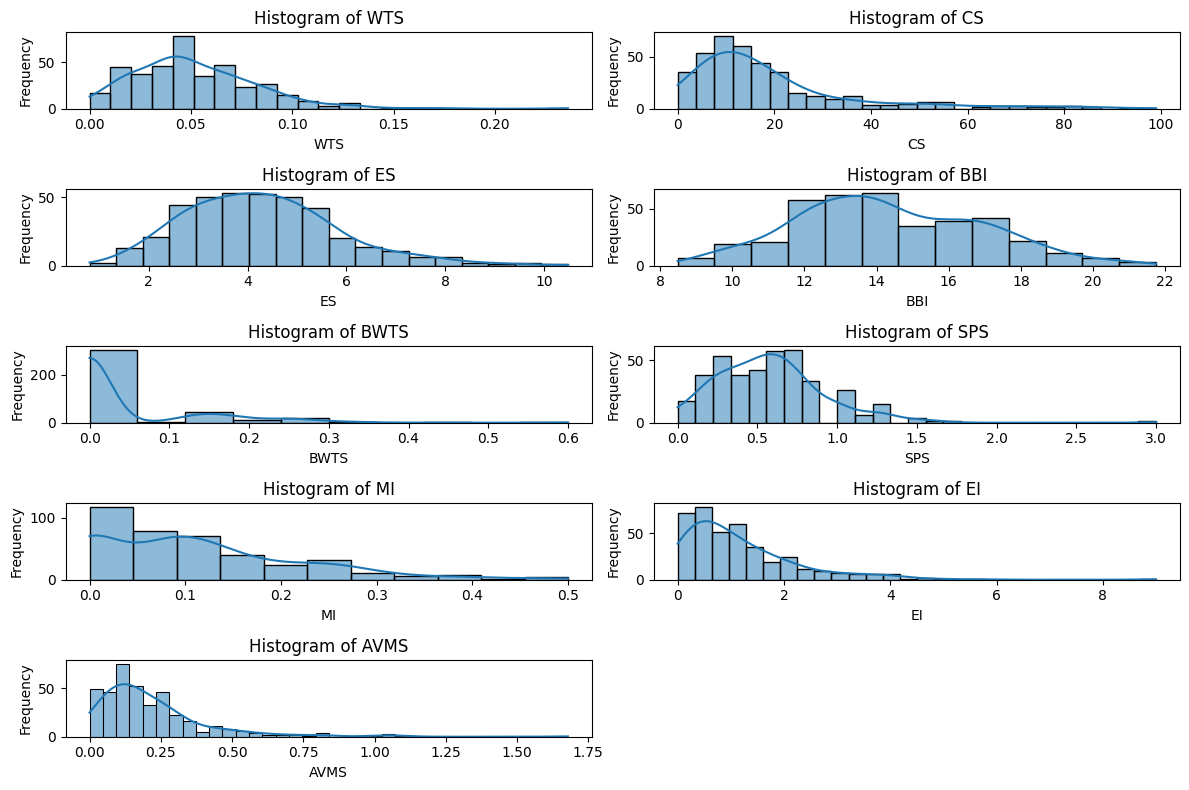

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = numeric_data.columns.tolist()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features,1):
  plt.subplot(5, 2, i)
  sns.histplot(df[feature], kde=True)
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

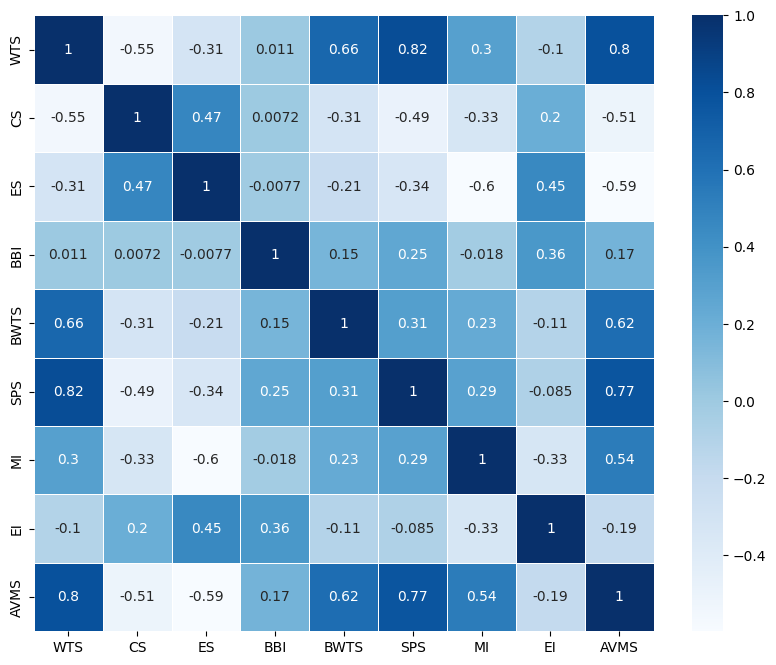

In [ ]:
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
# plt.title('Correlation Matrix of Performance Metrics (Bowlers)', fontsize=14)
plt.show()

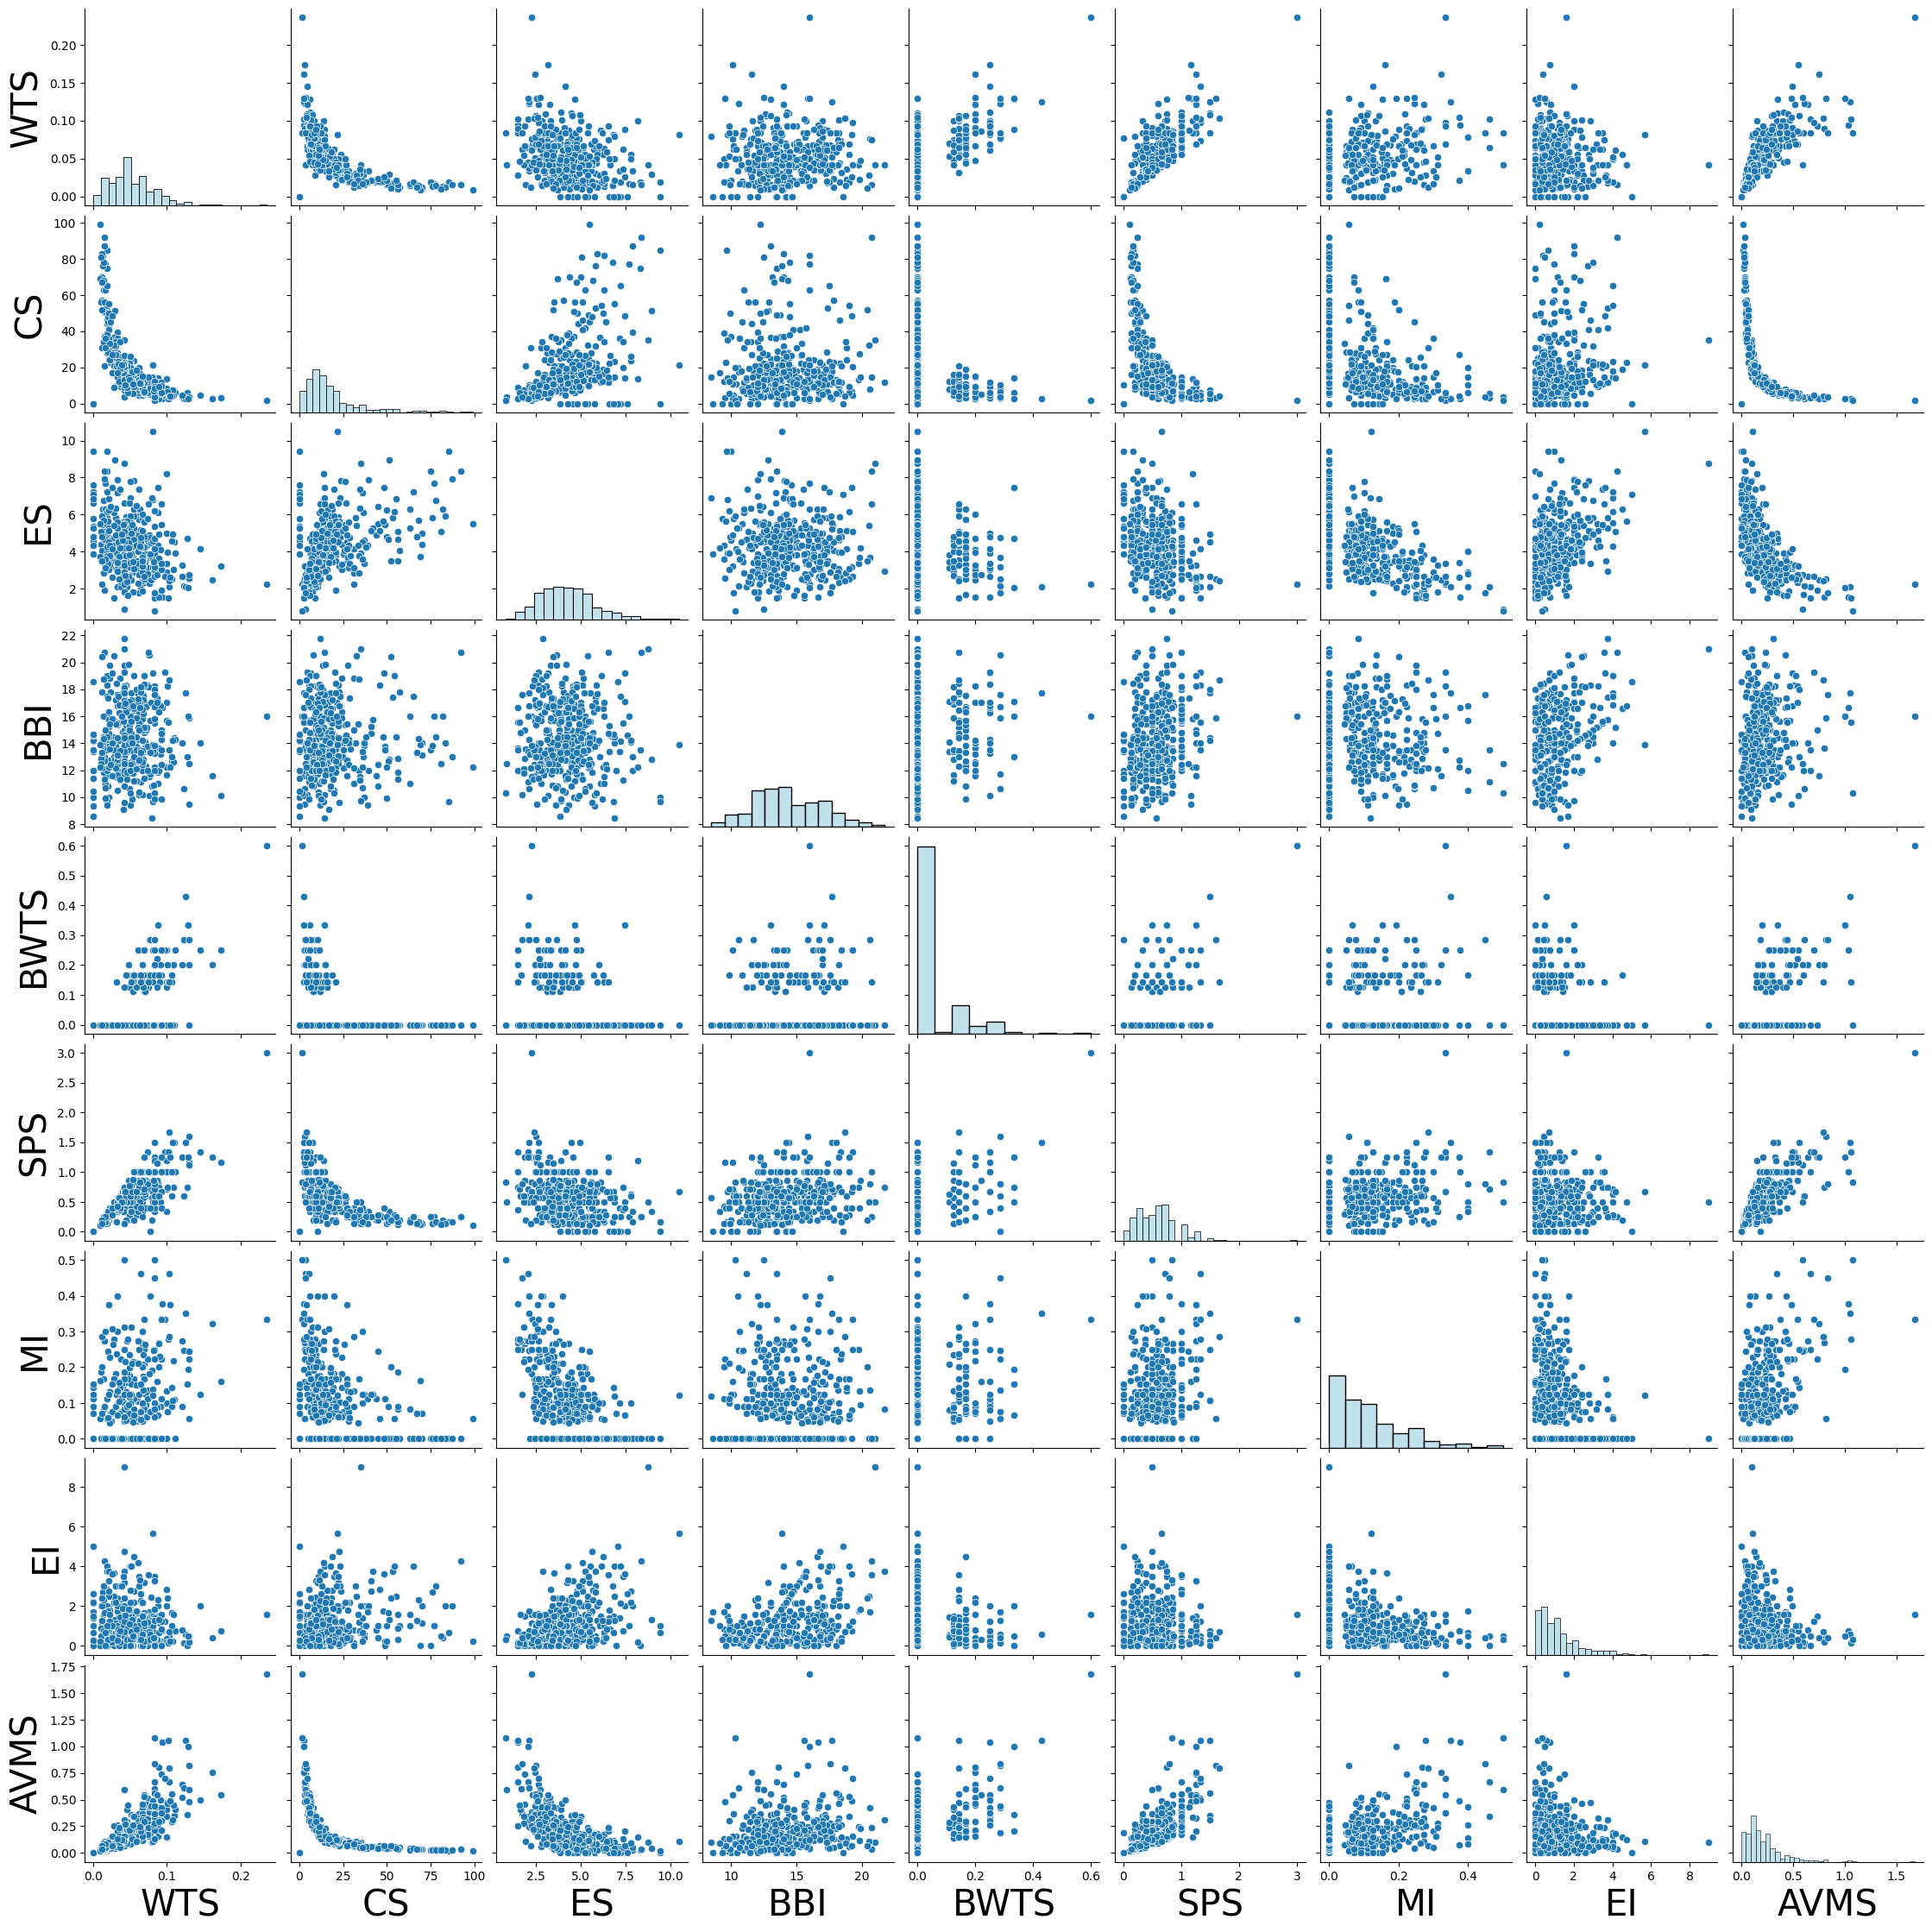

In [ ]:
sns.pairplot(numeric_data, diag_kws={'color': 'lightblue'})
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=30)
    ax.set_ylabel(ax.get_ylabel(), fontsize=30)
# plt.suptitle('Pairplot of Performance Metrics (Bowlers)', fontsize=16, y=1.02)
plt.show()

# Feature Scaling

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

transformed_data = np.log1p(numeric_data)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(transformed_data)
scaled_df = pd.DataFrame(scaled_data, columns=transformed_data.columns)
scaled_df

,WTS,CS,ES,BBI,BWTS,SPS,MI,EI,AVMS
0,0.209922,0.657636,0.681310,0.568698,0.000000,0.339036,0.411968,0.380211,0.118535
1,0.377484,0.535019,0.682276,0.632816,0.000000,0.500000,0.000000,0.653213,0.218461
2,0.204955,0.645017,0.643536,0.545431,0.000000,0.326025,0.308618,0.385356,0.122770
3,0.154545,0.655877,0.540302,0.428546,0.000000,0.242713,0.235064,0.255273,0.105265
4,0.103590,0.752575,0.565397,0.841236,0.000000,0.242713,0.308618,0.255273,0.097644
...,...,...,...,...,...,...,...,...,...
385,0.293117,0.539591,0.575548,0.471890,0.328038,0.242713,0.352831,0.124928,0.186712
386,0.286905,0.546711,0.581181,0.708754,0.000000,0.437221,0.000000,0.636819,0.220994
387,0.401809,0.505362,0.643536,0.689138,0.328038,0.339036,0.449660,0.367971,0.261791
388,0.154545,0.627636,0.482233,0.456603,0.000000,0.257301,0.159249,0.109140,0.122860


In [ ]:
descriptive_stats_scaled = scaled_df.describe()
descriptive_stats_scaled.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/EDA/Descriptive Statistics (Scaled).csv')

In [ ]:
scaled_df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/EDA/Bowling Performance Metrics (Scaled).csv', index=False)